In [2]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.offline as pyo
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r'C://Users/D/Downloads/asaless/SuperStoreOrders.csv')

In [4]:
pd.set_option('display.max_colwidth',1000)

In [5]:
data.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

# checking for null / na values


In [7]:
data.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [8]:
data.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

# Finding Duplicates

In [9]:
data.duplicated().count()

51290

In [10]:
data.count()

order_id          51290
order_date        51290
ship_date         51290
ship_mode         51290
customer_name     51290
segment           51290
state             51290
country           51290
market            51290
region            51290
product_id        51290
category          51290
sub_category      51290
product_name      51290
sales             51290
quantity          51290
discount          51290
profit            51290
shipping_cost     51290
order_priority    51290
year              51290
dtype: int64

### Since the no. of rows from the above results are same we come to conclusion that we have no duplicate values.

In [11]:
data.drop(['order_id','customer_name','order_priority'],axis=1,inplace=True)

In [12]:
data.drop(['product_id'],axis=1,inplace=True)
data.drop(['order_date','ship_date'],axis=1,inplace=True)


In [13]:
data.head(2)

,ship_mode,segment,state,country,market,region,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,year
0,Standard Class,Consumer,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,2011
1,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,2011


In [14]:
data.groupby(['segment']).sub_category.count()

segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: sub_category, dtype: int64

In [15]:
data.groupby(['market']).country.count().sort_values()

market
Canada      384
Africa     4587
EMEA       5029
US         9994
EU        10000
LATAM     10294
APAC      11002
Name: country, dtype: int64

In [16]:
data.head(10)

,ship_mode,segment,state,country,market,region,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,year
0,Standard Class,Consumer,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,2011
1,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,2011
2,Second Class,Consumer,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,2011
3,Second Class,Home Office,Stockholm,Sweden,EU,North,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,2011
4,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,2011
5,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55,2,0.1,15.342,1.80,2011
6,Standard Class,Consumer,Ontario,Canada,Canada,Canada,Technology,Machines,"Okidata Inkjet, Wireless",314,1,0.0,3.120,24.10,2011
7,Same Day,Corporate,New South Wales,Australia,APAC,Oceania,Office Supplies,Appliances,"Hoover Microwave, White",276,1,0.1,110.412,125.32,2011
8,Standard Class,Consumer,Auckland,New Zealand,APAC,Oceania,Technology,Copiers,"Hewlett Wireless Fax, Laser",912,4,0.4,-319.464,107.10,2011
9,Standard Class,Corporate,Ninawa,Iraq,EMEA,EMEA,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",667,4,0.0,253.320,81.26,2011


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ship_mode      51290 non-null  object 
 1   segment        51290 non-null  object 
 2   state          51290 non-null  object 
 3   country        51290 non-null  object 
 4   market         51290 non-null  object 
 5   region         51290 non-null  object 
 6   category       51290 non-null  object 
 7   sub_category   51290 non-null  object 
 8   product_name   51290 non-null  object 
 9   sales          51290 non-null  object 
 10  quantity       51290 non-null  int64  
 11  discount       51290 non-null  float64
 12  profit         51290 non-null  float64
 13  shipping_cost  51290 non-null  float64
 14  year           51290 non-null  int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 5.9+ MB


In [18]:
data.head(2)

,ship_mode,segment,state,country,market,region,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,year
0,Standard Class,Consumer,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,2011
1,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,2011


In [19]:
data.sort_values('discount', ascending=False).head(4)

,ship_mode,segment,state,country,market,region,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,year
18023,Standard Class,Corporate,Lower Saxony,Germany,EU,Central,Furniture,Tables,"Chromcraft Coffee Table, Fully Assembled",242,6,0.85,-1144.1160,23.38,2012
12082,Second Class,Home Office,Lower Saxony,Germany,EU,Central,Furniture,Tables,"Bevis Conference Table, Fully Assembled",555,4,0.85,-1924.5420,62.75,2012
6073,Standard Class,Corporate,Texas,United States,US,Central,Office Supplies,Binders,Avery Non-Stick Binders,1,1,0.80,-1.5715,0.04,2011
40950,First Class,Corporate,Illinois,United States,US,Central,Office Supplies,Appliances,Belkin F9S820V06 8 Outlet Surge,58,9,0.80,-146.1600,17.18,2014


In [20]:
data.sales=data.sales.str.replace(',','')
data.sales=data.sales.astype(float)

In [21]:
data.sales=data.sales.astype(float)


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ship_mode      51290 non-null  object 
 1   segment        51290 non-null  object 
 2   state          51290 non-null  object 
 3   country        51290 non-null  object 
 4   market         51290 non-null  object 
 5   region         51290 non-null  object 
 6   category       51290 non-null  object 
 7   sub_category   51290 non-null  object 
 8   product_name   51290 non-null  object 
 9   sales          51290 non-null  float64
 10  quantity       51290 non-null  int64  
 11  discount       51290 non-null  float64
 12  profit         51290 non-null  float64
 13  shipping_cost  51290 non-null  float64
 14  year           51290 non-null  int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 5.9+ MB


In [23]:
data_yearlyprofit=data.groupby('year').profit.sum()

In [113]:
data.head(2)

,ship_mode,segment,state,country,market,region,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,year,total_revenue
0,Standard Class,Consumer,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,2011,816.0
1,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,2011,360.0


In [27]:
data['total_revenue']=data.sales*data.quantity

In [28]:
data.head(3)

,ship_mode,segment,state,country,market,region,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,year,total_revenue
0,Standard Class,Consumer,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,2011,816.0
1,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,2011,360.0
2,Second Class,Consumer,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.640,8.17,2011,264.0


In [147]:
data_totalrev=data.groupby(['region','market'])['total_revenue'].sum()

In [148]:
data_totalrev=data_totalrev.reset_index()

In [149]:
data_totalrev=pd.DataFrame(data_totalrev)

In [150]:
data_totalrev.head(2)

,region,market,total_revenue
0,Africa,Africa,3130218.0
1,Canada,Canada,237288.0


In [34]:
data.head(2)

,ship_mode,segment,state,country,market,region,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,year,total_revenue
0,Standard Class,Consumer,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,2011,816.0
1,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,2011,360.0


In [144]:
data_segment_categ=data.groupby(['segment','category'])['sales'].sum()

In [134]:
# data_gb_categ_mark=data.groupby(['category','market']).sum()
data_gb_categ_mark=pd.DataFrame(data_gb_categ_mark)

In [164]:
data_gb_categ_mark.head(2)

sales  quantity  discount       profit  shipping_cost  \
category  market                                                              
Furniture APAC    1343958.0      9099    335.69  127473.6805      145694.45   
          Africa   194650.0      1431    100.10   16262.0850       20409.04   

                     year  total_revenue  
category  market                          
Furniture APAC    4889078      6764764.0  
          Africa  1270126       711433.0

In [138]:
data_gb_categ_mark.to_csv('category_market_reltnshp.csv')

In [141]:
data.to_csv("data_filtered.csv")

<AxesSubplot:xlabel='Profit', ylabel='segment'>

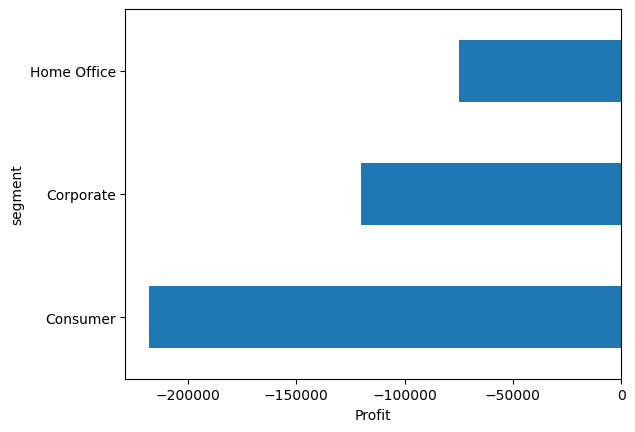

In [162]:
data.groupby(['segment']).apply(lambda x: x[x['discount'] > 0.50]['profit'].sum()).plot.barh(xlabel='Profit')

# Growth of Profit Over the given time period

<AxesSubplot:xlabel='year', ylabel='profit'>

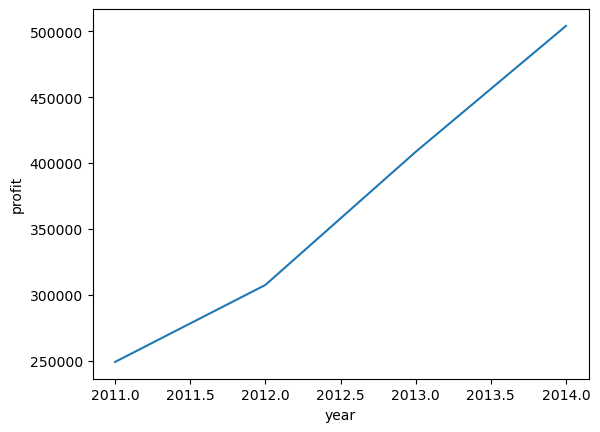

In [143]:
data_yearlyprofit.plot(ylabel='profit')

<AxesSubplot:ylabel='segment,category'>

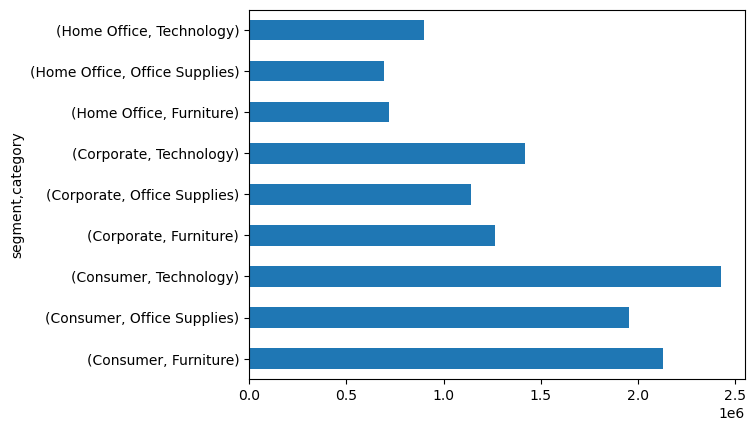

In [145]:
data.groupby(['segment','category'])['sales'].sum().plot()

# Total Revenue among different Regions using Plotly

In [157]:
import plotly.express as px


fig_1 =px.bar(x=data_totalrev.region, 
              y=data_totalrev.total_revenue,
              title="Total Revenue among different Regions",
              hover_name=data_totalrev.region,
              labels={
                     'x': 'Region',
                     'y': 'Total Revenue'}
              

             )
pyo.plot(fig_1)

'temp-plot.html'

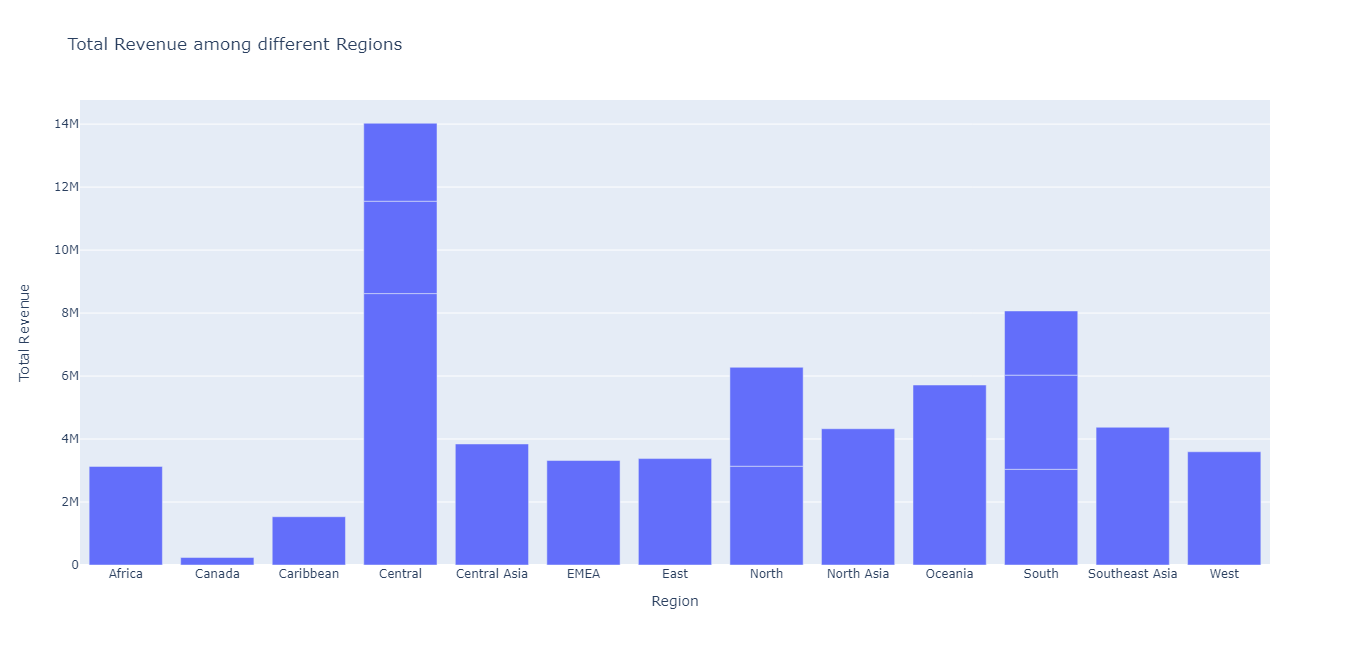

In [159]:
from IPython.display import Image
Image(filename='C://Users/D/Downloads/total_revenue_region.png')

# Power Bi Presentation of Total Revenue among various categories, segments,etc

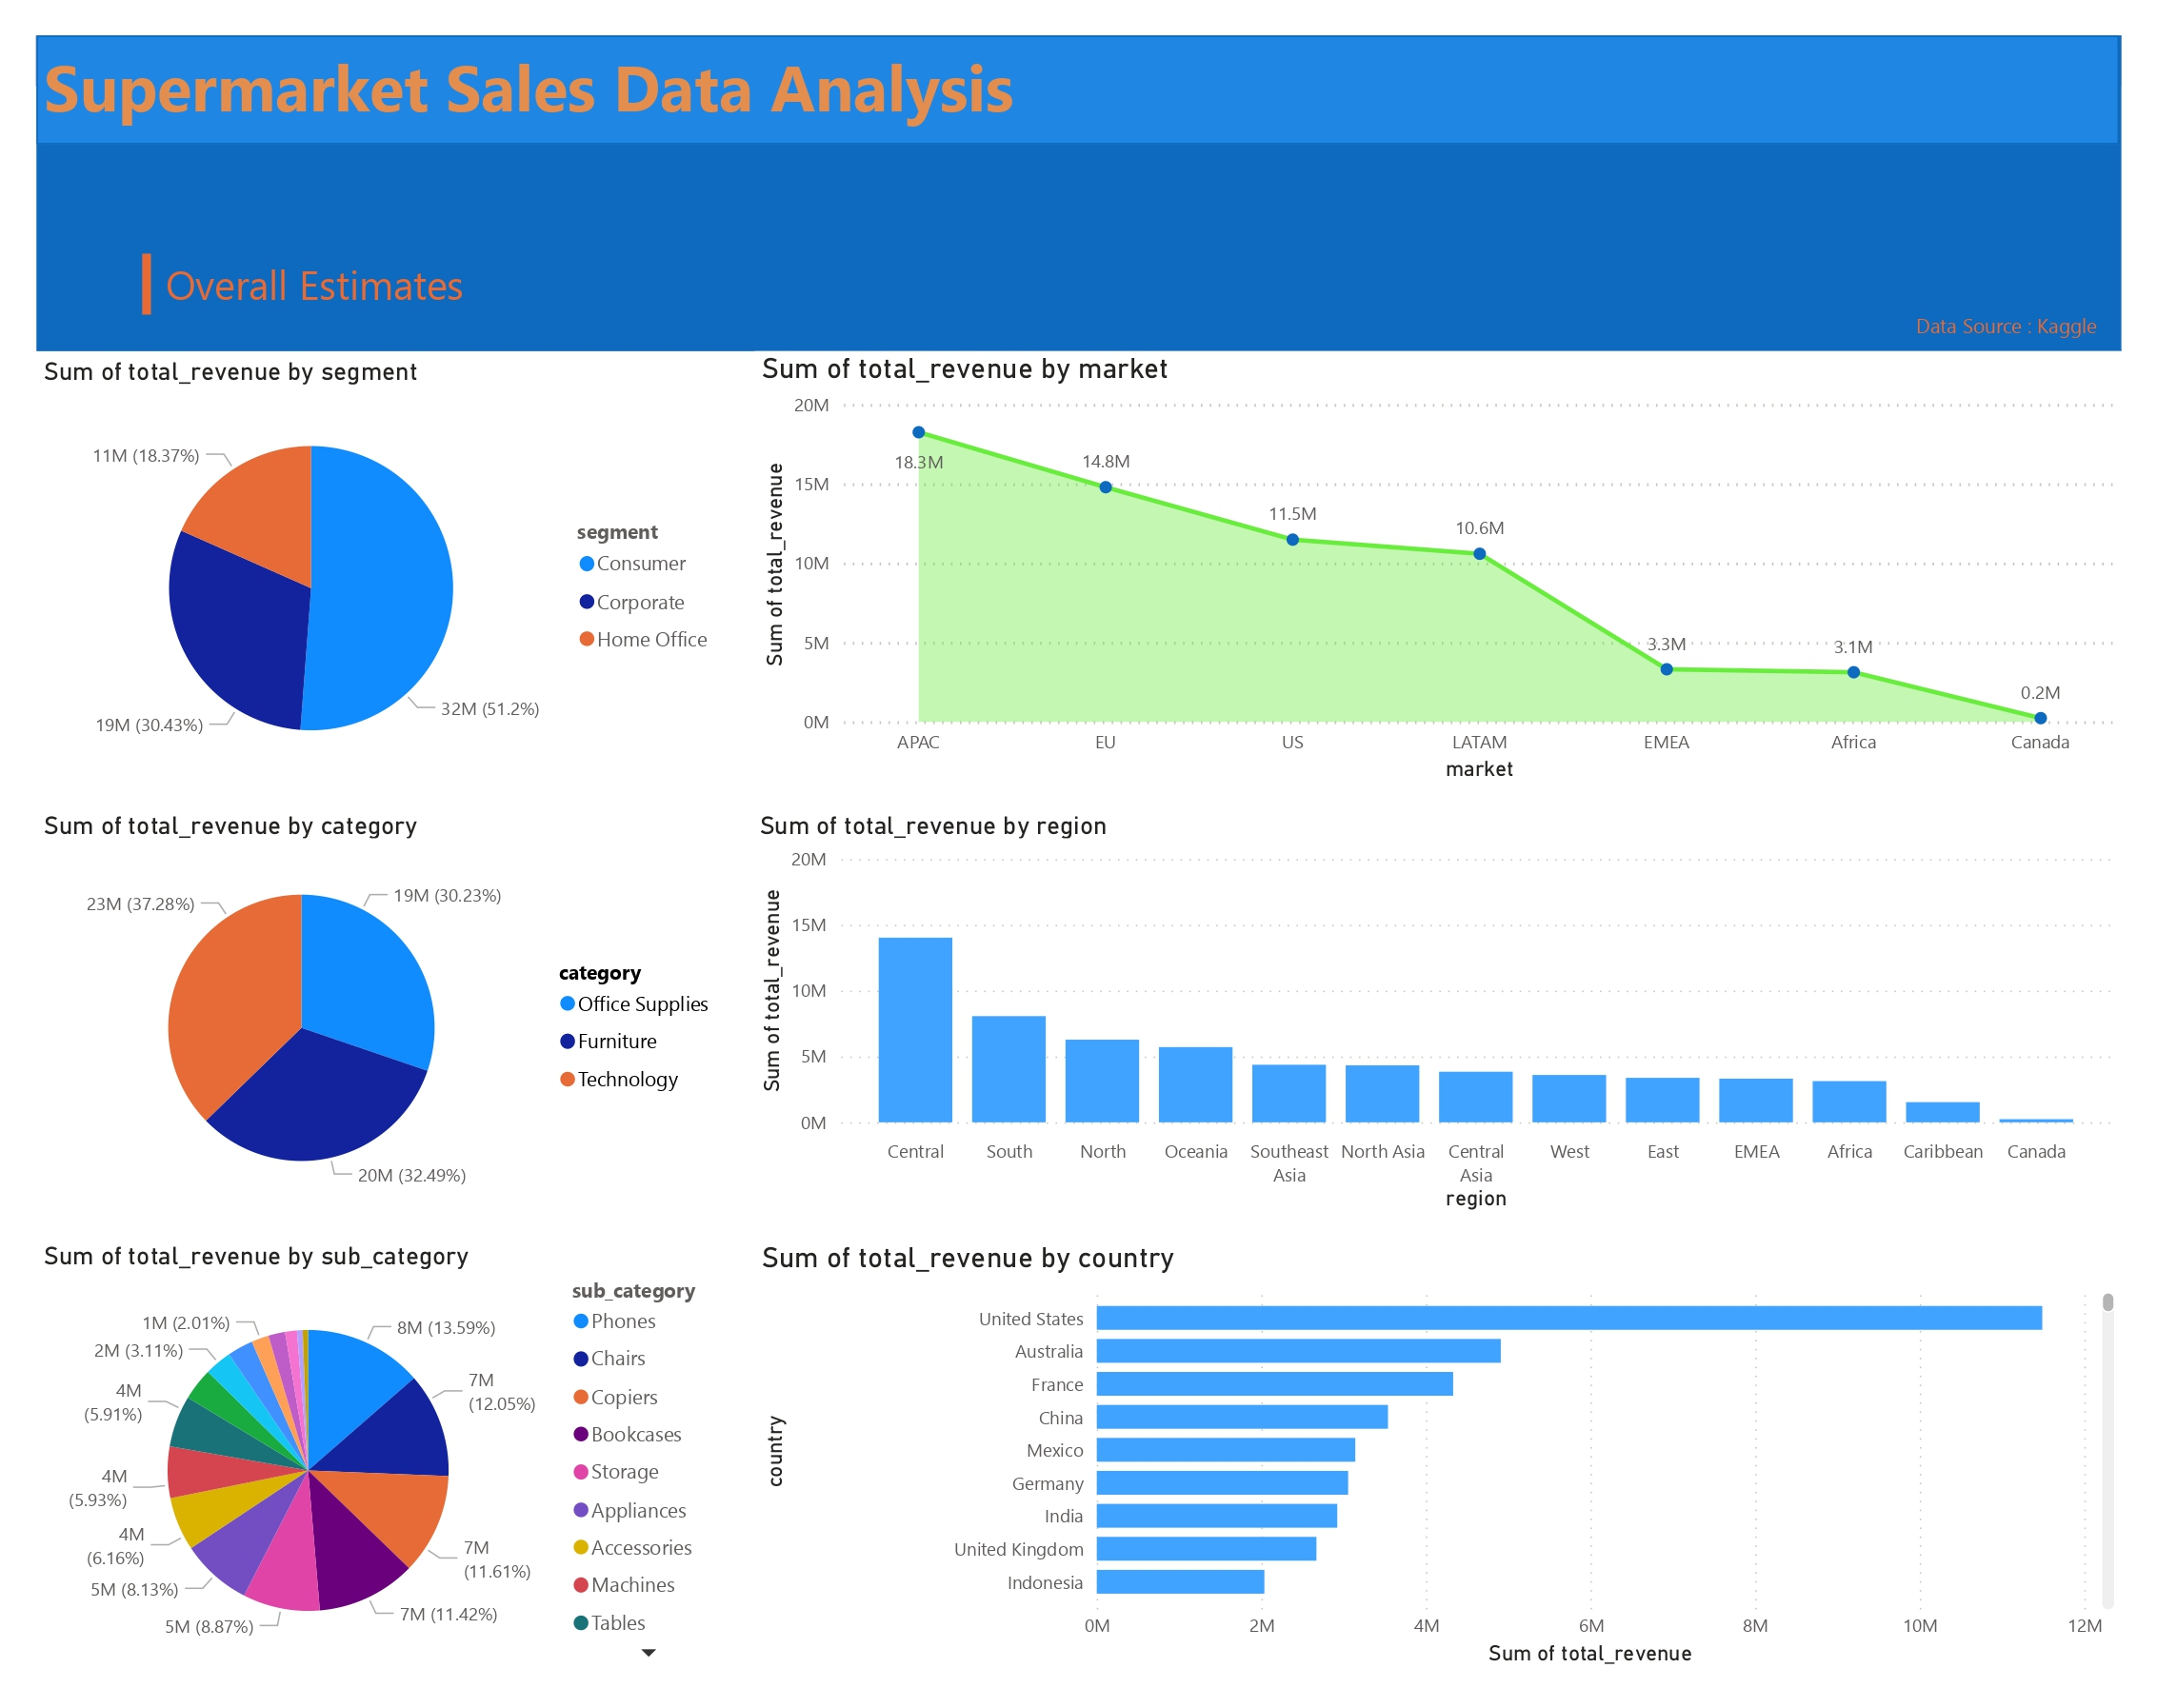

In [160]:
from IPython.display import Image
Image(filename='C://Users/D/Downloads/pbi_page-0001.jpg')

## Summary:


#### 1. The profit of the supermarket store shows Linear growth.
#### 2. There is a direct relationship between discount and profit of the store.There is a severe loss of profit among the products    whose discount is greater than 0.50%.
#### 3. The store needs to focus on sales and marketing among markets such as Canada, Africa, Caribbean.
#### 4. The Profit from categories among different segments lies in the order such that consumer > corporate > Home office